In [2]:
import sys
sys.path.append("../../diffusion_models/")
import torch
import matplotlib.pyplot as plt
from utils.datasets import FastMRIBrainTrain
from torch.fft import fftn, ifftn, fftshift

ds = FastMRIBrainTrain("/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train", size=256)
sample = ds.__getitem__(5)[0]

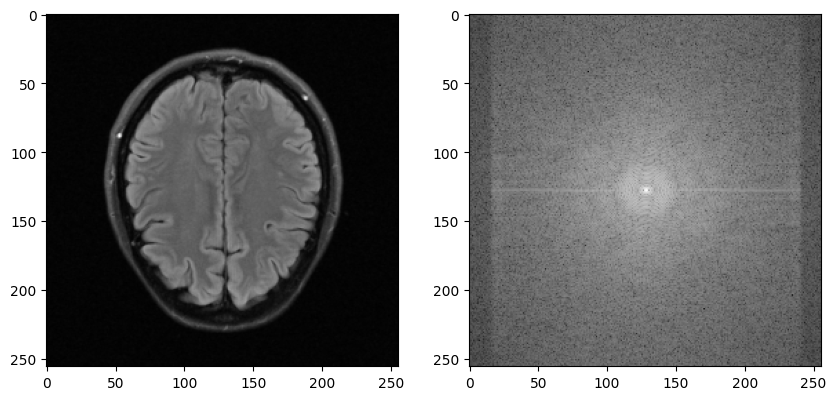

In [3]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(sample[0], cmap="gray")
sample_k = fftshift(fftn(sample, dim=(1,2), norm="ortho"), dim=(1,2))
ax[1].imshow(torch.log(torch.abs(sample_k[0])), cmap="gray")

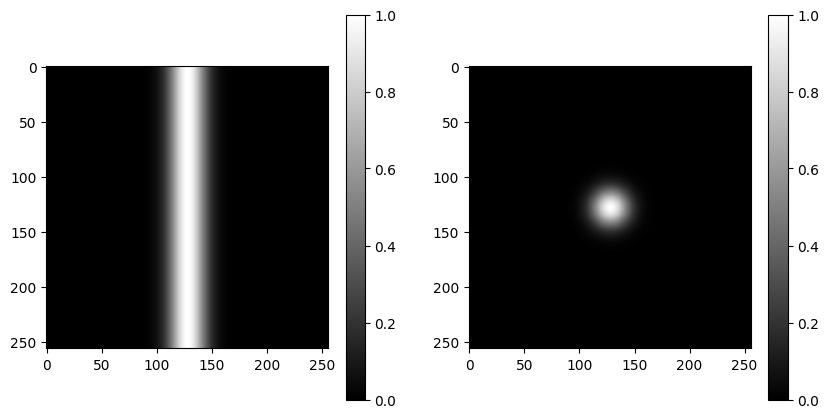

In [10]:
x, y = torch.arange(-sample.shape[-1]//2, sample.shape[-1]//2), torch.arange(-sample.shape[-2]//2, sample.shape[-2]//2)
x, y = torch.meshgrid([x,y])

sigma = 0.1
sigma = sigma*sample.shape[-1]//2
gaussian_2d = torch.exp(-(x**2)/(2*sigma**2) - (y**2)/(2*sigma**2))
gaussian_1d = torch.exp(-(y**2)/(2*sigma**2))[0:1,:].repeat(sample.shape[-2],1)

kwargs = {"vmin":0, "vmax":1}

fig, ax = plt.subplots(1,2, figsize=(10,5))
one = ax[0].imshow(gaussian_1d, cmap="gray", **kwargs)
two = ax[1].imshow(gaussian_2d, cmap="gray", **kwargs)
fig.colorbar(two)
fig.colorbar(one)

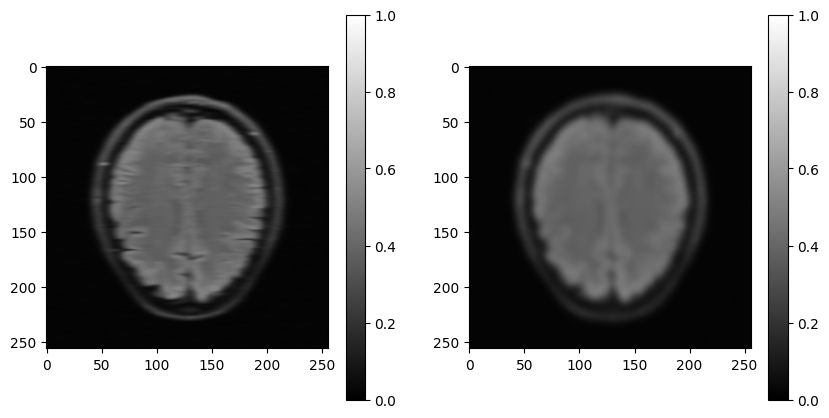

In [11]:
filtered_1d = torch.abs(ifftn(sample_k[0] * gaussian_1d, dim=(0,1), norm="ortho"))
filtered_2d = torch.abs(ifftn(sample_k[0] * gaussian_2d, dim=(0,1), norm="ortho"))

fig, ax = plt.subplots(1,2, figsize=(10,5))
one = ax[0].imshow(filtered_1d, cmap="gray", **kwargs)
two = ax[1].imshow(filtered_2d, cmap="gray", **kwargs)
fig.colorbar(two)
fig.colorbar(one)

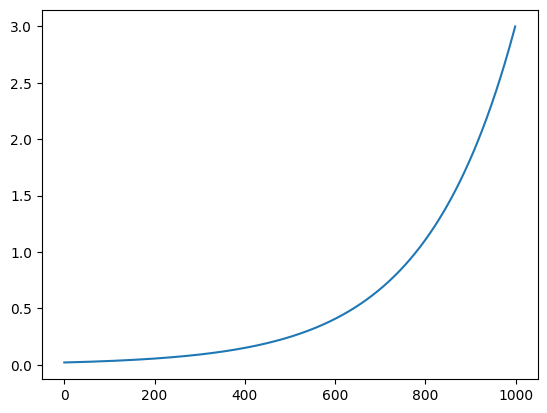

In [39]:
sigmas = torch.linspace(0, 1, 1000)
sigmas = torch.exp(5*sigmas)
sigmas = sigmas / torch.max(sigmas) * 3
plt.plot(sigmas)

In [40]:
sigmas[100]

tensor(0.0333)

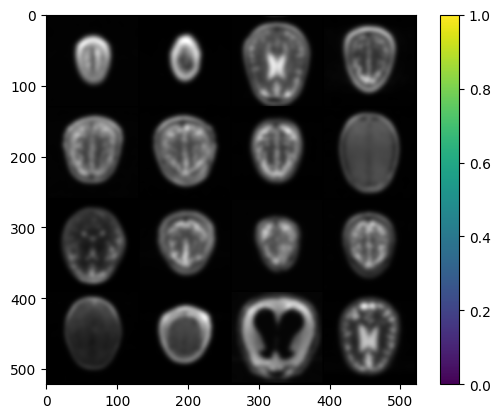

In [93]:
from ilvr import _2d_gaussian
from torch.fft import fftn, ifftn, fftshift
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

img = torch.load("samples_dutifulpond10.obj")
img_k = fftshift(fftn(img, dim=(-2,-1), norm="ortho"), dim=(-2,-1))
img_k_filtered = _2d_gaussian(normalized_sigma=0.1).unsqueeze(0).unsqueeze(0) * img_k
img_filtered = torch.abs(ifftn(img_k_filtered, dim=(-2,-1), norm="ortho"))

plt.imshow(make_grid(img_filtered, nrow=4, normalize=True).permute(1,2,0))
plt.colorbar()

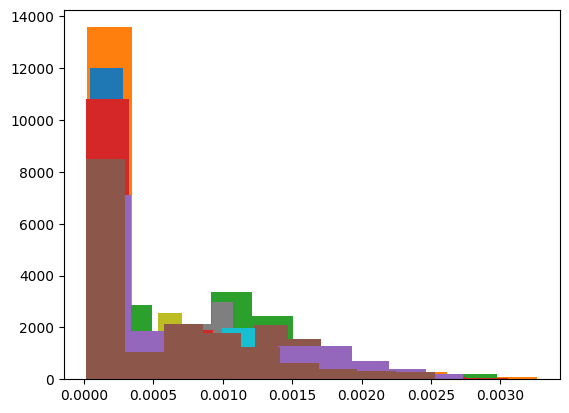

In [85]:
for elem in img_filtered:
    plt.hist(elem.view(-1))